In [109]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [110]:
prices= pd.read_csv("C:/Users/amogh/Desktop/Engage_2022/tables_V2.0/Price_table.csv")
df=pd.DataFrame(prices)
print("Data has been successfully imported")
df.head(4)

Data has been successfully imported


,Maker,Genmodel,Genmodel_ID,Year,Entry_price
0,Abarth,124 Spider,2_1,2016,29365
1,Abarth,124 Spider,2_1,2017,26665
2,Abarth,124 Spider,2_1,2018,26665
3,Abarth,124 Spider,2_1,2019,29515


In [111]:
gk = df.groupby('Maker')
a= gk.get_group('Abarth')
a

,Maker,Genmodel,Genmodel_ID,Year,Entry_price
0,Abarth,124 Spider,2_1,2016,29365
1,Abarth,124 Spider,2_1,2017,26665
2,Abarth,124 Spider,2_1,2018,26665
3,Abarth,124 Spider,2_1,2019,29515
4,Abarth,500,2_2,2009,13400
5,Abarth,500,2_2,2010,13945
6,Abarth,500,2_2,2011,13945
7,Abarth,500,2_2,2012,13750
8,Abarth,500,2_2,2013,13975
9,Abarth,500,2_2,2014,13975


In [112]:
gk2= a.groupby('Genmodel')
b= gk2.get_group('595')
b.index = b['Year']
b

,Maker,Genmodel,Genmodel_ID,Year,Entry_price
Year,,,,,
2012,Abarth,595,2_4,2012,17500
2013,Abarth,595,2_4,2013,17675
2014,Abarth,595,2_4,2014,14425
2015,Abarth,595,2_4,2015,14425
2016,Abarth,595,2_4,2016,14425
2017,Abarth,595,2_4,2017,14425
2018,Abarth,595,2_4,2018,15255


In [96]:
b = b[['Year', 'Entry_price']]
b.drop('Year',axis=1,inplace=True)
b.head()

C:\Users\amogh\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Entry_price
Year,
2012,17500
2013,17675
2014,14425
2015,14425
2016,14425


In [97]:
l= len(b) 
l

7

In [98]:
reshaped_b= b.values.reshape(-1,1)

In [99]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(reshaped_b)
reshaped_b = scaler.transform(reshaped_b)


In [101]:
n_prev = 3  
n_next = 2

X = []
Y = []

for i in range(n_prev, len(reshaped_b) - n_next + 1):
    X.append(reshaped_b[i - n_prev: i])
    Y.append(reshaped_b[i: i + n_next])

X = np.array(X)
Y = np.array(Y)

In [102]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_prev, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_next))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 50)             10400     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30,702
Trainable params: 30,702
Non-trainable params: 0
_________________________________________________________________


In [103]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=100, batch_size=n_prev, verbose=0)

In [113]:
last= reshaped_b[- n_prev:]  
last= last.reshape(1, n_prev, 1)

Next= model.predict(last).reshape(-1, 1)
Next= scaler.inverse_transform(Next)

1/1 [==============================] - 0s 35ms/step


In [105]:
b_past= b.reset_index()
b_past.index= b_past['Year']
b_past['Forecast'] = np.nan
b_past['Forecast'].iloc[-1] = b_past['Entry_price'].iloc[-1]

b_past

C:\Users\amogh\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Year,Entry_price,Forecast
Year,,,
2012,2012,17500,NaN
2013,2013,17675,NaN
2014,2014,14425,NaN
2015,2015,14425,NaN
2016,2016,14425,NaN
2017,2017,14425,NaN
2018,2018,15255,15255.0


In [106]:
b_future= pd.DataFrame(index= np.arange(n_next + 1))
b_future = pd.DataFrame(columns=['Year', 'Entry_price', 'Forecast'])

arr= []
for i in range(n_next+1):
    arr.append(b_past['Year'].iloc[-1] + i)
    
b_future['Year']= arr[1: n_next + 1]   

b_future.index= b_future['Year']
b_future['Forecast'] = Next.flatten()
b_future.head()

,Year,Entry_price,Forecast
Year,,,
2019,2019,NaN,14424.277344
2020,2020,NaN,15235.082031


In [107]:
forecasting= b_past.append(b_future).set_index('Year')
forecasting

,Entry_price,Forecast
Year,,
2012,17500,NaN
2013,17675,NaN
2014,14425,NaN
2015,14425,NaN
2016,14425,NaN
2017,14425,NaN
2018,15255,15255.000000
2019,NaN,14424.277344
2020,NaN,15235.082031


<AxesSubplot:title={'center':'Prices of required model and maker'}, xlabel='Year'>

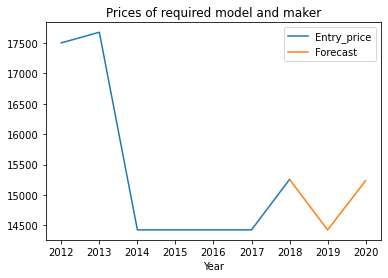

In [108]:
forecasting.plot(title= 'Prices of required model and maker')